# Exploratory Data Analysis and Data Preparation Part 1

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import math
import sklearn.metrics 
import time
from datetime import date
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the raw data

In [3]:
data_raw = pd.read_csv('./project/volume/data/raw/AmesHousing.csv')
'''
Optional Code: Allows Pandas to display all rows/columns (Pandas sometimes display only a truncated version of the data
               when it has a large number of rows/columns)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
'''

"\nOptional Code: Allows Pandas to display all rows/columns (Pandas sometimes display only a truncated version of the data\n               when it has a large number of rows/columns)\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\n"

## Step 3: Check the data structure

In [4]:
data_raw.head(5) # Check the first 5 rows of the dataframe

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data_raw.shape # Check for the number of rows and columns, should be (2930, 82)

(2930, 82)

In [6]:
data_raw.columns # Check for column names

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Step 4: Create a heatmap

"\nOptional Code: Explicitly display the plot when your environments won't automatically display it\nplt.show()\n"

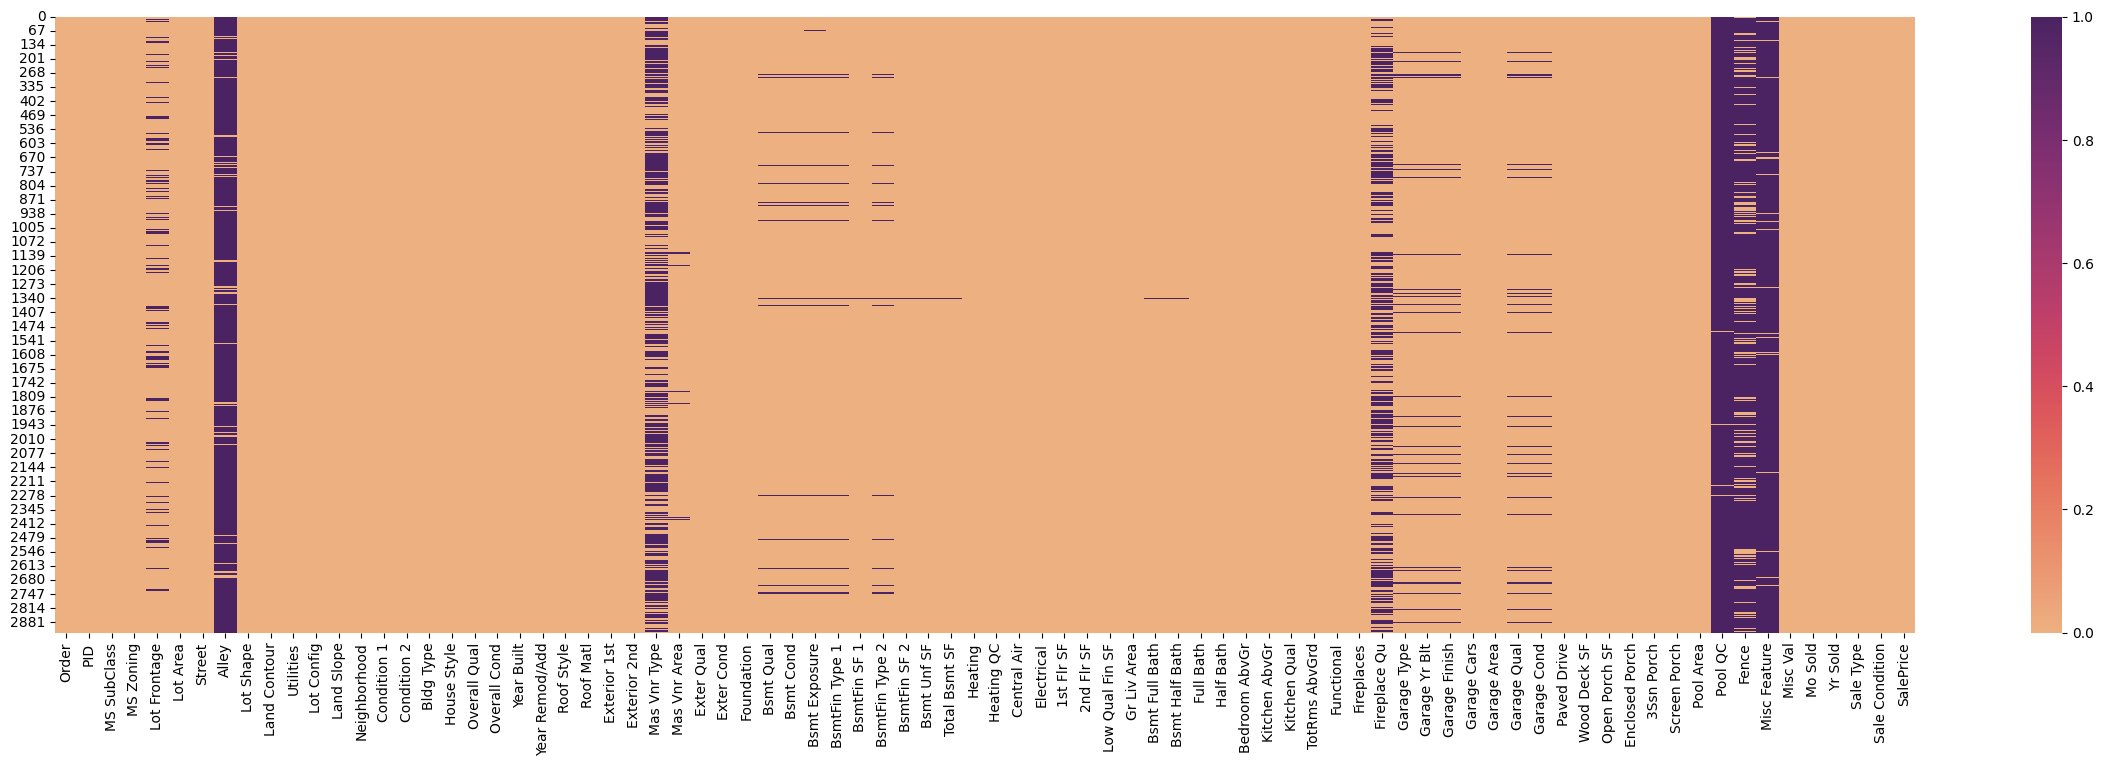

In [7]:
plt.figure(figsize = (30, 8)) # Set the size of the plot, change as needed
sb.heatmap(data_raw.isnull(), cmap = 'flare')
'''
Optional Code: Explicitly display the plot when your environments won't automatically display it
plt.show()
'''

## Step 5: Check for null values

In [8]:
# Count for null values in each column
count = data_raw.isnull().sum().sort_values(ascending = False) 
# Percentage of null values in each column
per = (data_raw.isnull().sum()/data_raw.isnull().count()*100).sort_values(ascending = False)
# Top columns with null values base on the count and percentage
null_data = pd.concat([count, per], axis = 1, keys = ['Count', 'Percent'])
print(null_data.head(15))

                Count    Percent
Pool QC          2917  99.556314
Misc Feature     2824  96.382253
Alley            2732  93.242321
Fence            2358  80.477816
Mas Vnr Type     1775  60.580205
Fireplace Qu     1422  48.532423
Lot Frontage      490  16.723549
Garage Cond       159   5.426621
Garage Finish     159   5.426621
Garage Yr Blt     159   5.426621
Garage Qual       159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
Bsmt Qual          80   2.730375


## Step 6: Drop index and identitification values as they are not needed

In [9]:
data_cl = data_raw.drop(labels = ['Order', 'PID'], axis = 1)

## Step 7: Drop the six columns with high count and percentage of null values

In [10]:
data_cl = data_cl.drop(labels = ['Pool QC', 'Misc Feature', 'Alley', 'Fence','Mas Vnr Type', 'Fireplace Qu'], axis = 1)

## Step 8: Check for the percentage distribution of the columns

In [11]:
# More than 99.89% of the Utilities column are AllPub
(data_cl.groupby('Utilities').size()/data_cl['Utilities'].count())*100

Utilities
AllPub    99.897611
NoSeWa     0.034130
NoSewr     0.068259
dtype: float64

In [12]:
# More than 99.59% of the Street column are Pave
(data_cl.groupby('Street').size()/data_cl['Street'].count())*100

Street
Grvl     0.409556
Pave    99.590444
dtype: float64

## Step 9: Drop Utilities and Street column

In [13]:
data_cl = data_cl.drop(labels = ['Utilities'], axis = 1)
data_cl = data_cl.drop(labels = ['Street'], axis = 1)

In [14]:
'''
Optional Code: Creat heatmap with the new cleaned data
plt.figure(figsize = (30, 8)) 
sb.heatmap(data_cl.isnull(), cmap = 'flare')
plt.show()

Optional Code: Check again for null values with the new cleaned data
count = data_cl.isnull().sum().sort_values(ascending = False)
per = (data_cl.isnull().sum()/data_cl.isnull().count()*100).sort_values(ascending = False)
null_data = pd.concat([count, per], axis = 1, keys = ['Count', 'Percent'])
print(null_data.head(10))
'''

"\nOptional Code: Creat heatmap with the new cleaned data\nplt.figure(figsize = (30, 8)) \nsb.heatmap(data_cl.isnull(), cmap = 'flare')\nplt.show()\n\nOptional Code: Check again for null values with the new cleaned data\ncount = data_cl.isnull().sum().sort_values(ascending = False)\nper = (data_cl.isnull().sum()/data_cl.isnull().count()*100).sort_values(ascending = False)\nnull_data = pd.concat([count, per], axis = 1, keys = ['Count', 'Percent'])\nprint(null_data.head(10))\n"

## Step 10: Filling the null values in numeric column with the mean

In [15]:
numeric_null = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Garage Area','Garage Cars', 'Total Bsmt SF',
                 'Bsmt Unf SF', 'BsmtFin SF 2']
for feature in numeric_null:
  data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mean())

## Step 11: Filling the null values in categorical column with the most frequent

In [16]:
categorical_null = ['Garage Cond', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Type', 'Bsmt Exposure',
                    'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Bsmt Full Bath', 'Bsmt Half Bath',
                    'Electrical']
for feature in categorical_null:
  data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mode()[0])

## Step 12: Check to make sure all null values are handled

In [17]:
count = data_cl.isnull().sum().sort_values(ascending = False)
per = (data_cl.isnull().sum()/data_cl.isnull().count()*100).sort_values(ascending = False)
null_data = pd.concat([count, per], axis = 1, keys = ['Count', 'Percent'])
print(null_data.head(10))

'''
Optional Code: Create heatmap again with the new cleaned data
plt.figure(figsize = (30, 8))
sb.heatmap(data_cl.isnull(), cmap = 'flare')
plt.show()
'''

               Count  Percent
MS SubClass        0      0.0
MS Zoning          0      0.0
Garage Type        0      0.0
Fireplaces         0      0.0
Functional         0      0.0
TotRms AbvGrd      0      0.0
Kitchen Qual       0      0.0
Kitchen AbvGr      0      0.0
Bedroom AbvGr      0      0.0
Half Bath          0      0.0


"\nOptional Code: Create heatmap again with the new cleaned data\nplt.figure(figsize = (30, 8))\nsb.heatmap(data_cl.isnull(), cmap = 'flare')\nplt.show()\n"

## Step 13: Save the data_cl DataFrame to a CSV file
data_cl is the data frame that addressed all the null values, save in interim as this is the data after basic cleaning

In [18]:
data_cl.to_csv('./project/volume/data/interim/data_cl.csv', index = False)

## Step 14: Check for numeric features' correlation with the SalePrice column

In [19]:
Sales_cor = data_cl[data_cl.columns[1:]].corr(numeric_only = True)['SalePrice'][:-1]
# Sort the correlations
Sales_cor.sort_values(ascending = False)

Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647861
Garage Area        0.640385
Total Bsmt SF      0.632105
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.505784
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.442271
BsmtFin SF 1       0.432794
Lot Frontage       0.340751
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182805
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005890
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
Name: SalePrice, dty

## Step 15: Create heatmap for features that are highly correlated with SalePrice

<Axes: >

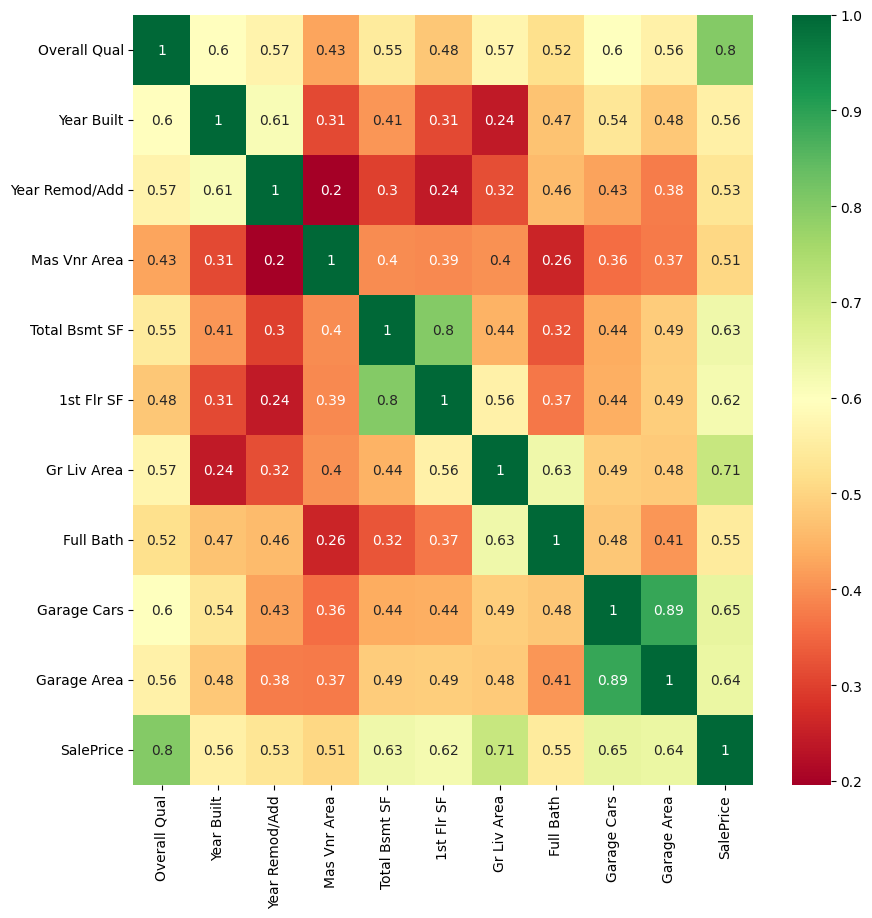

In [20]:
cor = data_cl.corr(numeric_only = True)
Highly_cor = cor.index[abs(cor['SalePrice']) > 0.5]
plt.figure(figsize = (10, 10))
sb.heatmap(data_cl[Highly_cor].corr(), annot = True, cmap = 'RdYlGn')
# plt.show()

## Step 16: Drop columns that have correlation with SalePrice from -0.01 to 0.01

In [21]:
Weak_cor = cor.index[abs(cor['SalePrice']) < 0.01]
data_clean = data_cl.drop(labels = Weak_cor, axis = 1)

## Step 17: Change the year columns to categorical and group by decade

In [22]:
# Year Built to Built Decade
data_clean['Built Decade'] = pd.cut(data_clean['Year Built'],
                                    bins = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
                                            1990, 2000, 2010],
                                    labels = ['1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950',
                                              '1960', '1970', '1980', '1990', '2000'])

In [23]:
# Year Remod/Add to Remodel Decade
data_clean['Remodel Decade'] = pd.cut(data_clean['Year Remod/Add'],
                                      bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
                                      labels = ['1940', '1950', '1960', '1970', '1980', '1990', '2000'])

In [24]:
# Drop Year Built and Year Remod/Add column
data_clean = data_clean.drop(labels = ['Year Built'], axis = 1) 
data_clean = data_clean.drop(labels = ['Year Remod/Add'], axis = 1)

## Step 18: Check for most frequent value in the Garage Yr Blt column

In [25]:
data_clean['Garage Yr Blt'].mode()

0    2005.0
Name: Garage Yr Blt, dtype: float64

## Step 19: Replace outlier in the Garage Yr Blt column with most frequent

In [26]:
data_clean['Garage Yr Blt'] = data_clean['Garage Yr Blt'].replace(to_replace = 2207, value = 2005)
'''
Optional Code: Get a summary of statistics for the Garage Yr Blt column
data_clean['Garage Yr Blt'].describe()
'''

"\nOptional Code: Get a summary of statistics for the Garage Yr Blt column\ndata_clean['Garage Yr Blt'].describe()\n"

## Step 20: Continue change the year columns to categorical and group by decade

In [27]:
# Garage Yr Blt to Garage Yr Blt Decade
data_clean['Garage Yr Blt Decade'] = pd.cut(data_clean['Garage Yr Blt'], 
                                            bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 
                                                    2000, 2010], 
                                            labels = ['1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960',
                                                      '1970', '1980', '1990', '2000'])

In [28]:
# Drop Garage Yr Blt column
data_clean = data_clean.drop(labels = ['Garage Yr Blt'], axis = 1)

## Step 21: Save the data_clean DataFrame to a CSV file
data_clean is the more advanced cleaned data, save in the interim folder

In [29]:
data_clean.to_csv('./project/volume/data/interim/data_clean.csv', index = False)

## Step 22: Check for the distribution of the house price

The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


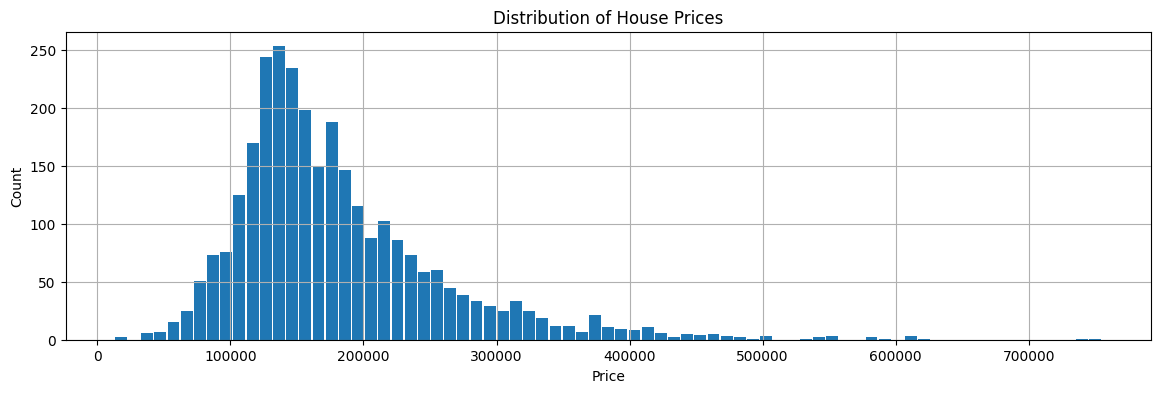

In [30]:
# Show the min, max, mean, and median
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(data_clean.SalePrice.min(), 
                                                                                        data_clean.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(data_clean.SalePrice.mean(), 
                                                                             data_clean.SalePrice.median()))
# Create a histogram
data_clean.SalePrice.hist(bins = 75, rwidth = .9, figsize = (14, 4))
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Step 23: Check for the distribution of the neighborhood

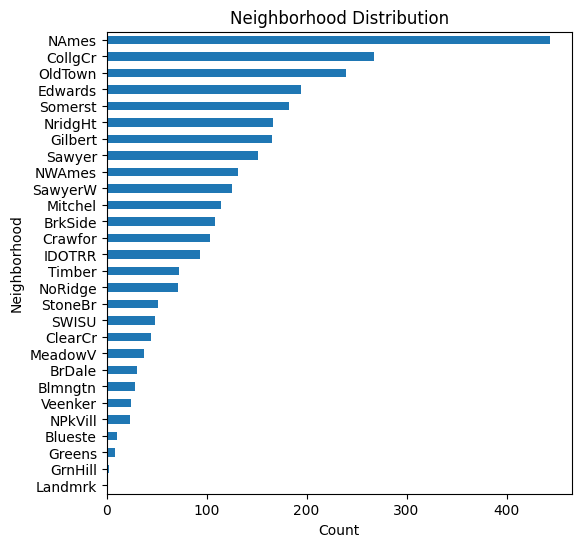

In [31]:
# Create a bar chart
data_clean.groupby('Neighborhood').size().sort_values().plot(kind = 'barh', figsize = (6, 6))
plt.title('Neighborhood Distribution')
plt.xlabel('Count')
plt.show()


## Step 24: Check for the distribution of the house size 

The smallest house has 334 sq ft of space, the biggest 5,642 sq ft
The average house has 1,500 sq ft of space, the median 1,442 sq ft


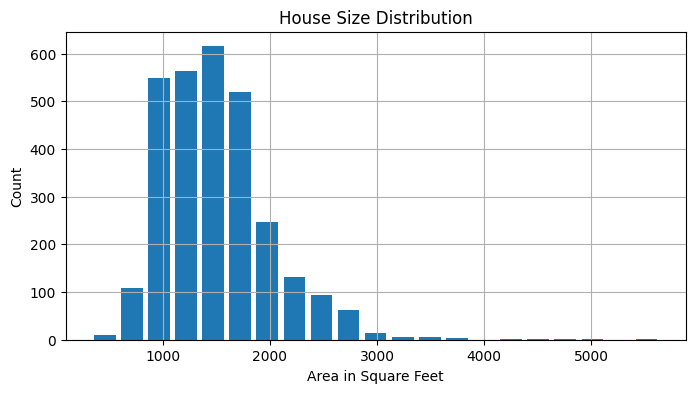

In [32]:
# Show the min, max, mean, and median
print('The smallest house has {:,.0f} sq ft of space, the biggest {:,.0f} sq ft'.format(data_clean['Gr Liv Area'].min(),
                                                                                        data_clean['Gr Liv Area'].max()))
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(data_clean['Gr Liv Area'].mean(), 
                                                                                      data_clean['Gr Liv Area'].median()))
# Create a histogram
data_clean['Gr Liv Area'].hist(bins = 21, rwidth = .8, figsize = (8, 4))
plt.title('House Size Distribution')
plt.xlabel('Area in Square Feet')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gr Liv Area', ylabel='Count'>

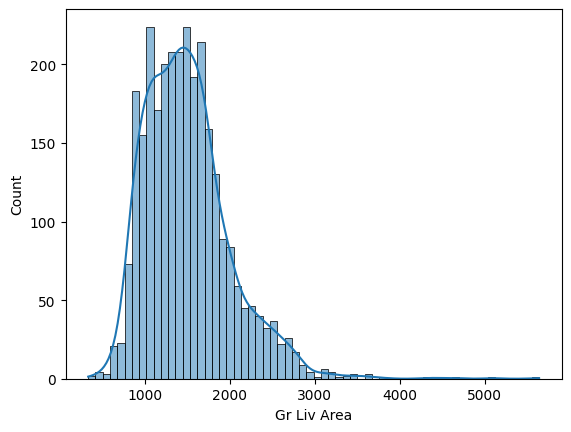

In [33]:
# Create another histogram with an additional kernel density estimate (KDE) overlay
sb.histplot(data = data_clean, x = 'Gr Liv Area', kde = True)

## Step 25: Visualizes the relationship between house size (Gr Liv Area) and house price (SalePrice)

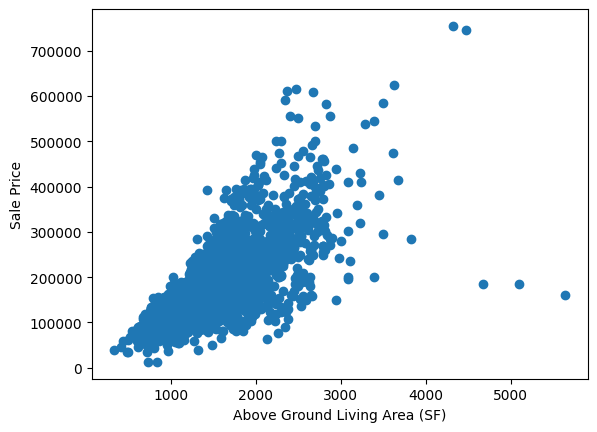

In [34]:
# Create a scatter plot
plt.scatter(data_clean['Gr Liv Area'], data_clean['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground Living Area (SF)')
plt.show()

## Step 26: Check for the distribution of prices per square foot across the houses

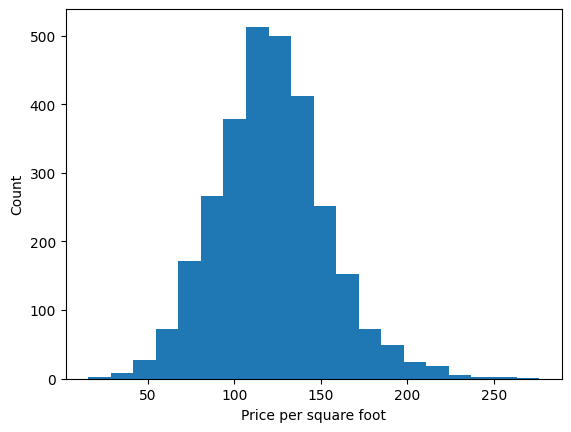

In [35]:
data_clean['PSF'] = data_clean['SalePrice']/data_clean['Gr Liv Area']
# Create a histogram
plt.hist(data_clean['PSF'], bins = 20)
plt.ylabel('Count')
plt.xlabel('Price per square foot')
plt.show()

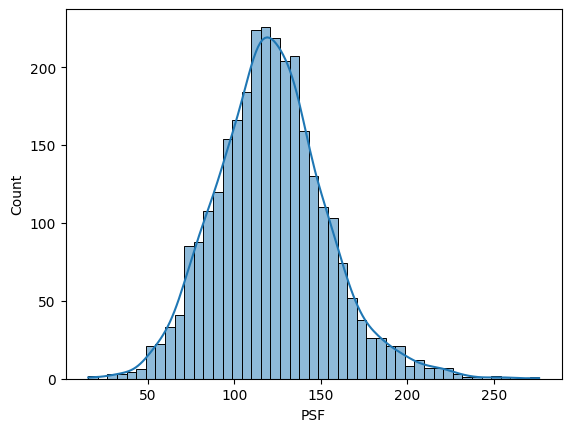

In [36]:
# Create another histogram with an additional kernel density estimate (KDE) overlay
sb.histplot(data = data_clean, x = 'PSF', kde = True)
plt.show()

## Step 27: Create boxplot for price per square foot by year sold

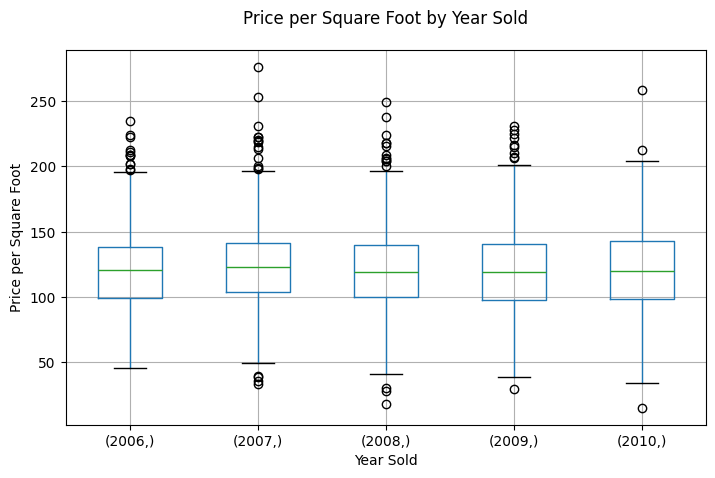

In [37]:
# Create a boxplot
data_clean.boxplot(column = ['PSF'], by = ['Yr Sold'], figsize = (8, 5))
plt.suptitle('Price per Square Foot by Year Sold')
plt.title('')
plt.ylabel('Price per Square Foot')
plt.xlabel('Year Sold')
plt.show()

## Step 28: Create boxplot for price per square foot by neighborhood in 2009

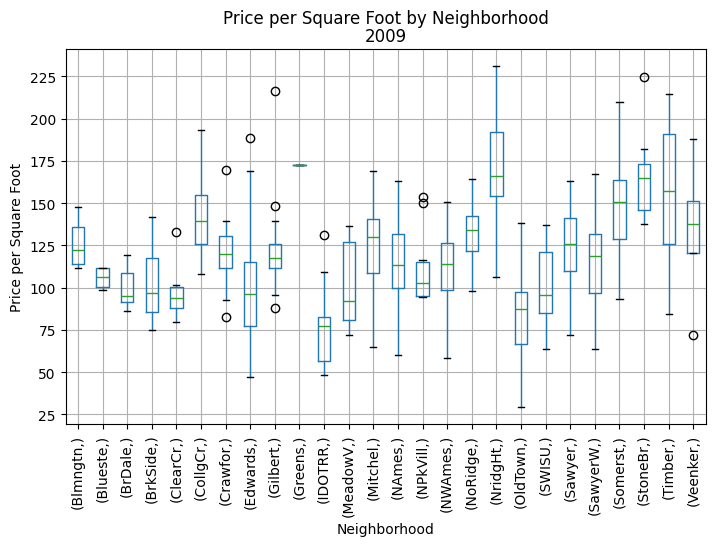

In [38]:
# Create a boxplot
data_clean[data_clean['Yr Sold'] == 2009].boxplot(column = ['PSF'], by = ['Neighborhood'], figsize = (8, 5), rot = 90)
plt.suptitle('Price per Square Foot by Neighborhood')
plt.title('2009')
plt.ylabel('Price per Square Foot')
plt.xlabel('Neighborhood')
plt.show()

## Step 29: Check for the distribution of prices per square foot across the different sale conditions

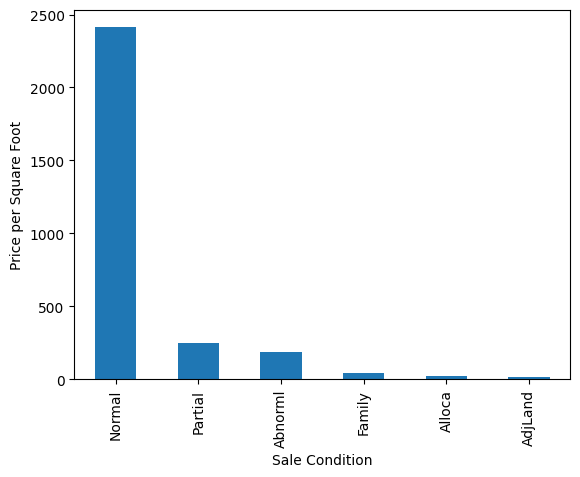

In [39]:
# Create a bar chart
data_clean['Sale Condition'].value_counts().plot(kind = 'bar')
plt.ylabel('Price per Square Foot')
plt.xlabel('Sale Condition')
plt.show()